In [20]:
import pandas as pd
import numpy as np

# Method Chaining

In [21]:
sales = pd.read_csv('sales_week4.csv')

In [22]:
sales.head()

,Date,Region,Type,Units,Sales
0,2020-07-11,East,Children's Clothing,18.0,306.0
1,2020-09-23,North,Children's Clothing,14.0,448.0
2,2020-04-02,South,Women's Clothing,17.0,425.0
3,2020-02-28,East,Children's Clothing,26.0,832.0
4,2020-03-19,West,Women's Clothing,3.0,NaN


## Typical Workflow

In [23]:
only_750 = sales.loc[0:750]
group_by_Type = only_750.groupby('Type')
agg = group_by_Type.agg({'Units':'mean', 'Sales':'sum'})
agg.sort_values('Sales', ascending=False)

,Units,Sales
Type,,
Women's Clothing,18.806250,128315.0
Children's Clothing,20.912442,89590.0
Men's Clothing,19.320261,87500.0


## Chain Method

In [24]:
(sales
.loc[0:750]
.groupby('Type')
.agg({'Units':'mean', 'Sales':'sum'})
.sort_values('Sales', ascending=False)
)

,Units,Sales
Type,,
Women's Clothing,18.806250,128315.0
Children's Clothing,20.912442,89590.0
Men's Clothing,19.320261,87500.0


In [25]:
print(sales.Units.isna().sum())
print(sales.Units.fillna(200).isna().sum())

107
0


# Date and Time
Pandas uses special methods and data types to handle date and time.  Using these methods/data-types allows you to manipulate dates/time in unique ways.  You are able to subset and filter data based on date/time.  You are also able to aggregate data into time windows such as days, quarters, and years.
* Epoch is January 1, 1970

##  There are many abbreviations that represent date/time  frequency
Documentation:  [DateOffsets](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)

<div align=left>

    
|letter|Object|
|------|------|
|M|Month|
|D|Day|
|Q|Quarterly|
|H|Hourly|
|W|Weekly|
|Y|Yearly|
|AS|YearStart|
    
    
</div>




## Convert column to datetime data type
### Pandas `to_datetime` function
This comes in useful for converting string columns in DataFrames to dates.
* to_datetime can transform Series

In [72]:
# Solution 1: use to_datetime
crime = pd.read_csv('bmore_crime.csv')
crime.info()
crime.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322843 entries, 0 to 322842
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeDateTime    322843 non-null  object 
 1   X                322843 non-null  float64
 2   Y                322843 non-null  float64
 3   RowID            322843 non-null  int64  
 4   CrimeCode        322843 non-null  object 
 5   Location         321329 non-null  object 
 6   Description      322843 non-null  object 
 7   Inside_Outside   281583 non-null  object 
 8   Weapon           69873 non-null   object 
 9   Post             322506 non-null  object 
 10  District         322506 non-null  object 
 11  Neighborhood     322485 non-null  object 
 12  Latitude         322843 non-null  float64
 13  Longitude        322843 non-null  float64
 14  GeoLocation      322843 non-null  object 
 15  Premise          281351 non-null  object 
 16  VRIName          38308 non-null   obje

,CrimeDateTime,X,Y,RowID,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,IS_HOMICIDE,IS_ARSON
0,2014-03-06 00:00:00+00:00,1.401790e+06,594782.869045,323492,6E,1100 WILDWOOD PKWY,LARCENY,O,NaN,815,SOUTHWEST,EDMONDSON VILLAGE,39.2994,-76.6839,"(39.2994,-76.6839)",STREET,NaN,1,False,False
1,2014-03-06 00:01:00+00:00,1.435028e+06,591859.750326,323422,6D,3600 -BLK MOUNT PLEASANT AV,LARCENY FROM AUTO,O,NaN,223,SOUTHEAST,BALTIMORE HIGHLANDS,39.2910,-76.5665,"(39.291,-76.5665)",STREET,NaN,1,False,False
2,2014-03-06 00:01:00+00:00,1.412582e+06,584951.726349,323410,6J,2100 WASHINGTON BLVD,LARCENY,O,NaN,935,SOUTHERN,CARROLL - CAMDEN INDUSTRIAL AREA,39.2723,-76.6459,"(39.2723,-76.6459)",OTHER - OUTSIDE,NaN,1,False,False
3,2014-03-06 01:00:00+00:00,1.403945e+06,593406.327562,323404,6E,700 LINNARD ST,LARCENY,O,NaN,815,SOUTHWEST,EDGEWOOD,39.2956,-76.6763,"(39.2956,-76.6763)",STREET,NaN,1,False,False
4,2014-03-06 01:01:00+00:00,1.419178e+06,591971.461564,323457,6J,500 W LEXINGTON ST,LARCENY,O,NaN,114,CENTRAL,DOWNTOWN,39.2915,-76.6225,"(39.2915,-76.6225)",STREET,NaN,1,False,False


In [27]:
# Solution 1: use to_datetime
crime['CrimeDateTime'] = pd.to_datetime(crime['CrimeDateTime'])
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322843 entries, 0 to 322842
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   CrimeDateTime    322843 non-null  datetime64[ns, UTC]
 1   X                322843 non-null  float64            
 2   Y                322843 non-null  float64            
 3   RowID            322843 non-null  int64              
 4   CrimeCode        322843 non-null  object             
 5   Location         321329 non-null  object             
 6   Description      322843 non-null  object             
 7   Inside_Outside   281583 non-null  object             
 8   Weapon           69873 non-null   object             
 9   Post             322506 non-null  object             
 10  District         322506 non-null  object             
 11  Neighborhood     322485 non-null  object             
 12  Latitude         322843 non-null  float64            
 13 

In [73]:
crime.head()

,CrimeDateTime,X,Y,RowID,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,IS_HOMICIDE,IS_ARSON
0,2014-03-06 00:00:00+00:00,1.401790e+06,594782.869045,323492,6E,1100 WILDWOOD PKWY,LARCENY,O,NaN,815,SOUTHWEST,EDMONDSON VILLAGE,39.2994,-76.6839,"(39.2994,-76.6839)",STREET,NaN,1,False,False
1,2014-03-06 00:01:00+00:00,1.435028e+06,591859.750326,323422,6D,3600 -BLK MOUNT PLEASANT AV,LARCENY FROM AUTO,O,NaN,223,SOUTHEAST,BALTIMORE HIGHLANDS,39.2910,-76.5665,"(39.291,-76.5665)",STREET,NaN,1,False,False
2,2014-03-06 00:01:00+00:00,1.412582e+06,584951.726349,323410,6J,2100 WASHINGTON BLVD,LARCENY,O,NaN,935,SOUTHERN,CARROLL - CAMDEN INDUSTRIAL AREA,39.2723,-76.6459,"(39.2723,-76.6459)",OTHER - OUTSIDE,NaN,1,False,False
3,2014-03-06 01:00:00+00:00,1.403945e+06,593406.327562,323404,6E,700 LINNARD ST,LARCENY,O,NaN,815,SOUTHWEST,EDGEWOOD,39.2956,-76.6763,"(39.2956,-76.6763)",STREET,NaN,1,False,False
4,2014-03-06 01:01:00+00:00,1.419178e+06,591971.461564,323457,6J,500 W LEXINGTON ST,LARCENY,O,NaN,114,CENTRAL,DOWNTOWN,39.2915,-76.6225,"(39.2915,-76.6225)",STREET,NaN,1,False,False


### Convert column by using the parse_dates parameter

In [28]:
# Solution 2:   use parse_dates named parameter
crime = pd.read_csv('bmore_crime.csv', parse_dates=['CrimeDateTime'])
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322843 entries, 0 to 322842
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   CrimeDateTime    322843 non-null  datetime64[ns, UTC]
 1   X                322843 non-null  float64            
 2   Y                322843 non-null  float64            
 3   RowID            322843 non-null  int64              
 4   CrimeCode        322843 non-null  object             
 5   Location         321329 non-null  object             
 6   Description      322843 non-null  object             
 7   Inside_Outside   281583 non-null  object             
 8   Weapon           69873 non-null   object             
 9   Post             322506 non-null  object             
 10  District         322506 non-null  object             
 11  Neighborhood     322485 non-null  object             
 12  Latitude         322843 non-null  float64            
 13 

## Filtering columns with time data

### Select all the rows in the CrimeDateTime column that have a certain date-time value

In [29]:
crime[crime.CrimeDateTime == '2021-03-05 11:03:00']

,CrimeDateTime,X,Y,RowID,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,IS_HOMICIDE,IS_ARSON
322795,2021-03-05 11:03:00+00:00,1.405569e+06,606306.144053,105,4C,3900 EDGEWOOD RD,AGG. ASSAULT,I,OTHER,625,NORTHWEST,EAST ARLINGTON,39.331,-76.6704,"(39.331,-76.6704)",APT/CONDO - OCCUPIED,NaN,1,False,False


### Partial match with `.between()` method
Allows you to do all the string searches above

In [30]:
crime[crime.CrimeDateTime.between('2021-01-01', '2021-01-02')].head()

,CrimeDateTime,X,Y,RowID,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,IS_HOMICIDE,IS_ARSON
318001,2021-01-01 00:00:00+00:00,1.424705e+06,609624.072429,4926,4D,900 E 41ST ST,AGG. ASSAULT,I,HANDS,525,NORTHERN,PEN LUCY,39.3399,-76.6027,"(39.3399,-76.6027)",ROW/TOWNHOUSE-OCC,NaN,1,False,False
318002,2021-01-01 00:00:00+00:00,1.407186e+06,597169.655984,4913,6G,2800 BAKER ST,LARCENY,NaN,NaN,813,SOUTHWEST,NORTHWEST COMMUNITY ACTION,39.3059,-76.6648,"(39.3059,-76.6648)",NaN,NaN,1,False,False
318003,2021-01-01 00:01:00+00:00,1.433651e+06,589813.522746,4879,6G,600 E FAYETTE ST,LARCENY,I,NaN,214,SOUTHEAST,CANTON,39.2854,-76.5714,"(39.2854,-76.5714)",POLICE DEPARTMENT,NaN,1,False,False
318004,2021-01-01 01:00:00+00:00,1.420727e+06,593762.671843,4902,6D,100 W CENTRE ST,LARCENY FROM AUTO,O,NaN,124,CENTRAL,MOUNT VERNON,39.2964,-76.6170,"(39.2964,-76.617)",STREET,NaN,1,False,False
318005,2021-01-01 01:07:00+00:00,1.434233e+06,592438.765254,4907,4E,3400 E BALTIMORE ST,COMMON ASSAULT,O,NaN,222,SOUTHEAST,BALTIMORE HIGHLANDS,39.2926,-76.5693,"(39.2926,-76.5693)",STREET,NaN,1,False,False


### To include both dates in `.between()` method  You must specify the end of the day

In [31]:
crime[crime.CrimeDateTime.between('2021-3-4', '2021-3-5 23:59:59')].shape

(130, 20)

### Filter dates with conditional expressions (VERY IMPORTANT!)

In [32]:
crime_jan1_mar6 = crime[(crime.CrimeDateTime >= '2021-01-01 22') & (crime.CrimeDateTime <= '2021-03-06 11:22:00')]

In [33]:
crime_jan1_mar6.groupby(['District', 'Description'])['Total_Incidents'].agg('sum')

District  Description         
CENTRAL   AGG. ASSAULT             81
          ARSON                     1
          AUTO THEFT               44
          BURGLARY                 37
          COMMON ASSAULT          128
                                 ... 
WESTERN   ROBBERY - CARJACKING      8
          ROBBERY - COMMERCIAL      2
          ROBBERY - RESIDENCE       8
          ROBBERY - STREET         28
          SHOOTING                 14
Name: Total_Incidents, Length: 124, dtype: int64

## Slicing time series intelligently
We've covered dataframe selection and slicing before.
We will introduce the concept of the DatetimeIndex.  We will examine
the Baltimore crimes dataset.  

In [34]:
crime = crime.set_index('CrimeDateTime')
print(crime.index[:2])

DatetimeIndex(['2014-03-06 00:00:00+00:00', '2014-03-06 00:01:00+00:00'], dtype='datetime64[ns, UTC]', name='CrimeDateTime', freq=None)


## DatetimeIndex
When we moved the CrimeDateTime column to the index with `set_index()` method we created a `DatetimeIndex`

In [35]:
crime.head()

,X,Y,RowID,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,IS_HOMICIDE,IS_ARSON
CrimeDateTime,,,,,,,,,,,,,,,,,,,
2014-03-06 00:00:00+00:00,1.401790e+06,594782.869045,323492,6E,1100 WILDWOOD PKWY,LARCENY,O,NaN,815,SOUTHWEST,EDMONDSON VILLAGE,39.2994,-76.6839,"(39.2994,-76.6839)",STREET,NaN,1,False,False
2014-03-06 00:01:00+00:00,1.435028e+06,591859.750326,323422,6D,3600 -BLK MOUNT PLEASANT AV,LARCENY FROM AUTO,O,NaN,223,SOUTHEAST,BALTIMORE HIGHLANDS,39.2910,-76.5665,"(39.291,-76.5665)",STREET,NaN,1,False,False
2014-03-06 00:01:00+00:00,1.412582e+06,584951.726349,323410,6J,2100 WASHINGTON BLVD,LARCENY,O,NaN,935,SOUTHERN,CARROLL - CAMDEN INDUSTRIAL AREA,39.2723,-76.6459,"(39.2723,-76.6459)",OTHER - OUTSIDE,NaN,1,False,False
2014-03-06 01:00:00+00:00,1.403945e+06,593406.327562,323404,6E,700 LINNARD ST,LARCENY,O,NaN,815,SOUTHWEST,EDGEWOOD,39.2956,-76.6763,"(39.2956,-76.6763)",STREET,NaN,1,False,False
2014-03-06 01:01:00+00:00,1.419178e+06,591971.461564,323457,6J,500 W LEXINGTON ST,LARCENY,O,NaN,114,CENTRAL,DOWNTOWN,39.2915,-76.6225,"(39.2915,-76.6225)",STREET,NaN,1,False,False


### Use `.loc` to select all the rows equal to a single index

In [36]:
crime.loc['2021-03-05 23:22:00']

X                      1412407.830977
Y                       593328.449765
RowID                              83
CrimeCode                          4D
Location           1800 EDMONDSON AVE
Description              AGG. ASSAULT
Inside_Outside                      I
Weapon                          HANDS
Post                              722
District                      WESTERN
Neighborhood              HARLEM PARK
Latitude                      39.2953
Longitude                    -76.6464
GeoLocation        (39.2953,-76.6464)
Premise             ROW/TOWNHOUSE-OCC
VRIName                           NaN
Total_Incidents                     1
IS_HOMICIDE                     False
IS_ARSON                        False
Name: 2021-03-05 23:22:00+00:00, dtype: object

### Select all rows that partially match an index value

In [37]:
crime.loc['2021-03-05'].head(3)

,X,Y,RowID,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,IS_HOMICIDE,IS_ARSON
CrimeDateTime,,,,,,,,,,,,,,,,,,,
2021-03-05 00:50:00+00:00,1.415660e+06,600917.388361,118,4E,800 BROOKS LN,COMMON ASSAULT,I,NaN,133,CENTRAL,RESERVOIR HILL,39.3161,-76.6348,"(39.3161,-76.6348)",ROW/TOWNHOUSE-OCC,NaN,1,False,False
2021-03-05 01:05:00+00:00,1.431170e+06,593699.327108,79,4E,400 N GLOVER ST,COMMON ASSAULT,I,NaN,221,SOUTHEAST,MCELDERRY PARK,39.2961,-76.5801,"(39.2961,-76.5801)",ROW/TOWNHOUSE-OCC,NaN,1,False,False
2021-03-05 01:35:00+00:00,1.427741e+06,588511.626228,65,4E,1700 THAMES ST,COMMON ASSAULT,NaN,NaN,213,SOUTHEAST,FELLS POINT,39.2819,-76.5923,"(39.2819,-76.5923)",NaN,NaN,1,False,False


### Select all rows for a single month or year or hour

In [38]:
crime.loc['2021-03'].shape

(334, 19)

In [39]:
crime.loc['2021'].shape

(4842, 19)

In [40]:
crime.loc['2021-03-05 15'].shape

(3, 19)

### Contain the name of the month

In [41]:
crime.loc['Dec 2020'].sort_index()

,X,Y,RowID,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,IS_HOMICIDE,IS_ARSON
CrimeDateTime,,,,,,,,,,,,,,,,,,,
2020-12-01 00:00:00+00:00,1.443294e+06,597218.202055,7654,7A,6700 PULASKI HWY,AUTO THEFT,O,NaN,441,NORTHEAST,PULASKI INDUSTRIAL AREA,39.3056,-76.5372,"(39.3056,-76.5372)",STREET,NaN,1,False,False
2020-12-01 00:00:00+00:00,1.431397e+06,593627.523625,7658,6G,400 N LAKEWOOD AVE,LARCENY,NaN,NaN,221,SOUTHEAST,MCELDERRY PARK,39.2959,-76.5793,"(39.2959,-76.5793)",NaN,NaN,1,False,False
2020-12-01 00:00:00+00:00,1.417378e+06,589086.622729,7634,5A,400 SCOTT ST,BURGLARY,NaN,NaN,932,SOUTHERN,WASHINGTON VILLAGE/PIGTOWN,39.2836,-76.6289,"(39.2836,-76.6289)",NaN,NaN,1,False,False
2020-12-01 00:00:00+00:00,1.407598e+06,592982.454220,7635,7A,2800 EDMONDSON AVE,AUTO THEFT,O,NaN,721,WESTERN,PENROSE/FAYETTE STREET OUTREACH,39.2944,-76.6634,"(39.2944,-76.6634)",GAS STATION,NaN,1,False,False
2020-12-01 00:00:00+00:00,1.414291e+06,596723.211212,7704,3AJF,1300 N WOODYEAR ST,ROBBERY - CARJACKING,O,FIREARM,724,WESTERN,SANDTOWN-WINCHESTER,39.3046,-76.6397,"(39.3046,-76.6397)",STREET,NaN,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 22:00:00+00:00,1.420729e+06,586550.818106,4991,6J,100 W CROSS ST,LARCENY,NaN,NaN,942,SOUTHERN,SHARP-LEADENHALL,39.2766,-76.6171,"(39.2766,-76.6171)",NaN,NaN,1,False,False
2020-12-31 22:30:00+00:00,1.443239e+06,608035.871858,4977,4E,5800 ARIZONA AVE,COMMON ASSAULT,I,NaN,444,NORTHEAST,FRANKFORD,39.3353,-76.5372,"(39.3353,-76.5372)",ROW/TOWNHOUSE-OCC,NaN,1,False,False
2020-12-31 22:40:00+00:00,1.404120e+06,584046.130423,4974,4C,1000 PINE HEIGHTS AVE,AGG. ASSAULT,I,OTHER,832,SOUTHWEST,VIOLETVILLE,39.2699,-76.6758,"(39.2699,-76.6758)",ROW/TOWNHOUSE-OCC,NaN,1,False,False


In [42]:
crime.loc['2014-03-06':'2021-03-05'].sort_index()

,X,Y,RowID,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,IS_HOMICIDE,IS_ARSON
CrimeDateTime,,,,,,,,,,,,,,,,,,,
2014-03-06 00:00:00+00:00,1.401790e+06,594782.869045,323492,6E,1100 WILDWOOD PKWY,LARCENY,O,NaN,815,SOUTHWEST,EDMONDSON VILLAGE,39.2994,-76.6839,"(39.2994,-76.6839)",STREET,NaN,1,False,False
2014-03-06 00:01:00+00:00,1.435028e+06,591859.750326,323422,6D,3600 -BLK MOUNT PLEASANT AV,LARCENY FROM AUTO,O,NaN,223,SOUTHEAST,BALTIMORE HIGHLANDS,39.2910,-76.5665,"(39.291,-76.5665)",STREET,NaN,1,False,False
2014-03-06 00:01:00+00:00,1.412582e+06,584951.726349,323410,6J,2100 WASHINGTON BLVD,LARCENY,O,NaN,935,SOUTHERN,CARROLL - CAMDEN INDUSTRIAL AREA,39.2723,-76.6459,"(39.2723,-76.6459)",OTHER - OUTSIDE,NaN,1,False,False
2014-03-06 01:00:00+00:00,1.403945e+06,593406.327562,323404,6E,700 LINNARD ST,LARCENY,O,NaN,815,SOUTHWEST,EDGEWOOD,39.2956,-76.6763,"(39.2956,-76.6763)",STREET,NaN,1,False,False
2014-03-06 01:01:00+00:00,1.419178e+06,591971.461564,323457,6J,500 W LEXINGTON ST,LARCENY,O,NaN,114,CENTRAL,DOWNTOWN,39.2915,-76.6225,"(39.2915,-76.6225)",STREET,NaN,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-05 22:00:00+00:00,1.413494e+06,597703.521426,146,4E,1600 N CALHOUN ST,COMMON ASSAULT,I,NaN,734,WESTERN,SANDTOWN-WINCHESTER,39.3073,-76.6425,"(39.3073,-76.6425)",OTHER - INSIDE,Western,1,False,False
2021-03-05 22:37:00+00:00,1.422088e+06,586520.130461,92,5D,1100 LIGHT ST,BURGLARY,I,NaN,942,SOUTHERN,FEDERAL HILL,39.2765,-76.6123,"(39.2765,-76.6123)",OTHER - INSIDE,NaN,1,False,False
2021-03-05 23:12:00+00:00,1.430416e+06,597666.060889,91,9S,2500 E HOFFMAN ST,SHOOTING,Outside,FIREARM,331,EASTERN,BEREA,39.3070,-76.5827,"(39.307,-76.5827)",STREET,NaN,1,False,False


## Using methods that only work with a DatetimeIndex

In [43]:
type(crime.index)

pandas.core.indexes.datetimes.DatetimeIndex

### Use `.between_time()` method
Select all crimes that occurred between 2 A.M. and 5 A.M. regardless of the date

In [44]:
crime.between_time('2:00', '5:00', include_end=False)

/var/folders/36/96tmt9j102l42r36wlwkfb2m0000gn/T/ipykernel_14950/581884243.py:1: FutureWarning: `include_start` and `include_end` are deprecated in favour of `inclusive`.
  crime.between_time('2:00', '5:00', include_end=False)


,X,Y,RowID,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,IS_HOMICIDE,IS_ARSON
CrimeDateTime,,,,,,,,,,,,,,,,,,,
2014-03-06 02:35:00+00:00,1.409615e+06,598453.518195,323458,4D,2400 W NORTH AVE,AGG. ASSAULT,I,HANDS,731,WESTERN,COPPIN HEIGHTS/ASH-CO-EAST,39.3094,-76.6562,"(39.3094,-76.6562)",ROW/TOWNHOUSE-OCC,NaN,1,False,False
2014-03-06 03:08:00+00:00,1.414806e+06,588020.016145,323387,7A,1000 BAYARD ST,AUTO THEFT,O,NaN,935,SOUTHERN,WASHINGTON VILLAGE/PIGTOWN,39.2807,-76.6380,"(39.2807,-76.638)",STREET,NaN,1,False,False
2014-03-07 02:00:00+00:00,1.414980e+06,594139.860806,323338,6E,700 N CARROLLTON AVE,LARCENY,O,NaN,713,WESTERN,HARLEM PARK,39.2975,-76.6373,"(39.2975,-76.6373)",STREET,Central,1,False,False
2014-03-07 02:00:00+00:00,1.408011e+06,595970.717651,323361,6E,2700 ELLICOTT DR,LARCENY,O,NaN,814,SOUTHWEST,WINCHESTER,39.3026,-76.6619,"(39.3026,-76.6619)",STREET,NaN,1,False,False
2014-03-07 02:59:00+00:00,1.422824e+06,606374.209059,323349,3AF,500 E 35TH ST,ROBBERY - STREET,O,FIREARM,525,NORTHERN,WAVERLY,39.3310,-76.6094,"(39.331,-76.6094)",STREET,NaN,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-05 03:00:00+00:00,1.432479e+06,592139.162803,139,6G,0 S CURLEY ST,LARCENY,I,NaN,222,SOUTHEAST,PATTERSON PARK NEIGHBORHOOD,39.2918,-76.5755,"(39.2918,-76.5755)",ROW/TOWNHOUSE-OCC,NaN,1,False,False
2021-03-05 03:38:00+00:00,1.420062e+06,576604.474094,88,4C,3000 ASCENSION ST,AGG. ASSAULT,I,OTHER,922,SOUTHERN,CHERRY HILL,39.2493,-76.6196,"(39.2493,-76.6196)",ROW/TOWNHOUSE-OCC,NaN,1,False,False
2021-03-05 03:40:00+00:00,1.411849e+06,584147.580296,87,4A,2200 WASHINGTON BLVD,AGG. ASSAULT,O,FIREARM,831,SOUTHWEST,MORRELL PARK,39.2701,-76.6485,"(39.2701,-76.6485)",PARKING LOT-OUTSIDE,NaN,1,False,False


### Select all dates at a specific time with `.at_time`

In [45]:
crime.at_time('5:47').head()

,X,Y,RowID,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,IS_HOMICIDE,IS_ARSON
CrimeDateTime,,,,,,,,,,,,,,,,,,,
2014-03-28 05:47:00+00:00,1.433202e+06,600920.674257,320922,6E,2700 EDISON HWY,LARCENY,O,NaN,434,NORTHEAST,BELAIR-EDISON,39.3159,-76.5728,"(39.3159,-76.5728)",STREET,NaN,1,False,False
2014-07-26 05:47:00+00:00,1.427277e+06,609963.213380,305369,3AF,4200 LOCH RAVEN BLVD,ROBBERY - STREET,O,FIREARM,413,NORTHEAST,NEW NORTHWOOD,39.3408,-76.5936,"(39.3408,-76.5936)",STREET,NaN,1,False,False
2014-08-31 05:47:00+00:00,1.411817e+06,599846.007041,300625,5D,2200 N MONROE ST,BURGLARY,I,NaN,731,WESTERN,MONDAWMIN,39.3132,-76.6484,"(39.3132,-76.6484)",OTHER - INSIDE,Western,1,False,False
2015-01-29 05:47:00+00:00,1.421640e+06,605422.145231,281809,6J,3300 GUILFORD AVE,LARCENY,O,NaN,512,NORTHERN,CHARLES VILLAGE,39.3284,-76.6136,"(39.3284,-76.6136)",STREET,NaN,1,False,False
2015-02-12 05:47:00+00:00,1.441657e+06,585044.436986,280291,6C,6100 HOLABIRD AVE,LARCENY,I,NaN,231,SOUTHEAST,BROENING MANOR,39.2722,-76.5432,"(39.2722,-76.5432)",OTHER - INSIDE,NaN,1,False,False


### `first()` methods allow for selecting the first n segments of time

In [46]:
crime.first('5D').head()

,X,Y,RowID,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,IS_HOMICIDE,IS_ARSON
CrimeDateTime,,,,,,,,,,,,,,,,,,,
2014-03-06 00:00:00+00:00,1.401790e+06,594782.869045,323492,6E,1100 WILDWOOD PKWY,LARCENY,O,NaN,815,SOUTHWEST,EDMONDSON VILLAGE,39.2994,-76.6839,"(39.2994,-76.6839)",STREET,NaN,1,False,False
2014-03-06 00:01:00+00:00,1.435028e+06,591859.750326,323422,6D,3600 -BLK MOUNT PLEASANT AV,LARCENY FROM AUTO,O,NaN,223,SOUTHEAST,BALTIMORE HIGHLANDS,39.2910,-76.5665,"(39.291,-76.5665)",STREET,NaN,1,False,False
2014-03-06 00:01:00+00:00,1.412582e+06,584951.726349,323410,6J,2100 WASHINGTON BLVD,LARCENY,O,NaN,935,SOUTHERN,CARROLL - CAMDEN INDUSTRIAL AREA,39.2723,-76.6459,"(39.2723,-76.6459)",OTHER - OUTSIDE,NaN,1,False,False
2014-03-06 01:00:00+00:00,1.403945e+06,593406.327562,323404,6E,700 LINNARD ST,LARCENY,O,NaN,815,SOUTHWEST,EDGEWOOD,39.2956,-76.6763,"(39.2956,-76.6763)",STREET,NaN,1,False,False
2014-03-06 01:01:00+00:00,1.419178e+06,591971.461564,323457,6J,500 W LEXINGTON ST,LARCENY,O,NaN,114,CENTRAL,DOWNTOWN,39.2915,-76.6225,"(39.2915,-76.6225)",STREET,NaN,1,False,False


In [47]:
crime.first('3QS').head()

,X,Y,RowID,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,IS_HOMICIDE,IS_ARSON
CrimeDateTime,,,,,,,,,,,,,,,,,,,
2014-03-06 00:00:00+00:00,1.401790e+06,594782.869045,323492,6E,1100 WILDWOOD PKWY,LARCENY,O,NaN,815,SOUTHWEST,EDMONDSON VILLAGE,39.2994,-76.6839,"(39.2994,-76.6839)",STREET,NaN,1,False,False
2014-03-06 00:01:00+00:00,1.435028e+06,591859.750326,323422,6D,3600 -BLK MOUNT PLEASANT AV,LARCENY FROM AUTO,O,NaN,223,SOUTHEAST,BALTIMORE HIGHLANDS,39.2910,-76.5665,"(39.291,-76.5665)",STREET,NaN,1,False,False
2014-03-06 00:01:00+00:00,1.412582e+06,584951.726349,323410,6J,2100 WASHINGTON BLVD,LARCENY,O,NaN,935,SOUTHERN,CARROLL - CAMDEN INDUSTRIAL AREA,39.2723,-76.6459,"(39.2723,-76.6459)",OTHER - OUTSIDE,NaN,1,False,False
2014-03-06 01:00:00+00:00,1.403945e+06,593406.327562,323404,6E,700 LINNARD ST,LARCENY,O,NaN,815,SOUTHWEST,EDGEWOOD,39.2956,-76.6763,"(39.2956,-76.6763)",STREET,NaN,1,False,False
2014-03-06 01:01:00+00:00,1.419178e+06,591971.461564,323457,6J,500 W LEXINGTON ST,LARCENY,O,NaN,114,CENTRAL,DOWNTOWN,39.2915,-76.6225,"(39.2915,-76.6225)",STREET,NaN,1,False,False


## Counting the number of weekly crimes
We will use grouping according to some period of time to answer this question.

In [48]:
crime.groupby(pd.Grouper(freq='W')).size()

CrimeDateTime
2014-03-09 00:00:00+00:00    411
2014-03-16 00:00:00+00:00    828
2014-03-23 00:00:00+00:00    713
2014-03-30 00:00:00+00:00    796
2014-04-06 00:00:00+00:00    851
                            ... 
2021-02-07 00:00:00+00:00    518
2021-02-14 00:00:00+00:00    466
2021-02-21 00:00:00+00:00    465
2021-02-28 00:00:00+00:00    562
2021-03-07 00:00:00+00:00    334
Freq: W-SUN, Length: 366, dtype: int64

## Aggregating weekly homicides and arsons separately
1. Group by each quarter then sum the IS_HOMICIDE and IS_ARSON columns for each group
2. use resample method
3. use groupby method

In [49]:
crime.groupby(pd.Grouper(freq='Q'))[['IS_HOMICIDE', 'IS_ARSON']].sum().head()

,IS_HOMICIDE,IS_ARSON
CrimeDateTime,,
2014-03-31 00:00:00+00:00,6,5
2014-06-30 00:00:00+00:00,52,63
2014-09-30 00:00:00+00:00,66,61
2014-12-31 00:00:00+00:00,46,58
2015-03-31 00:00:00+00:00,50,48


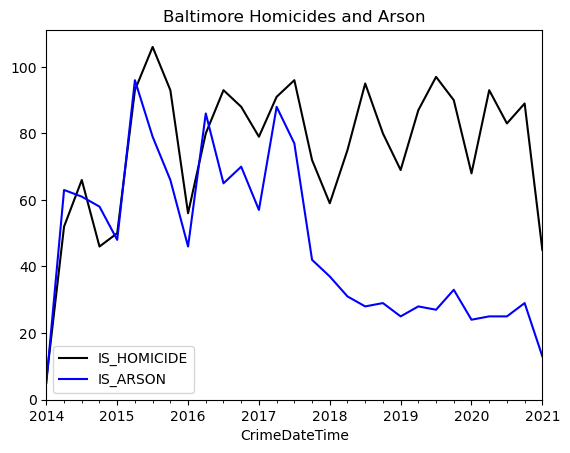

In [50]:
# Plot Quarterly Frequency of Homicides and Arson
crime.groupby(pd.Grouper(freq='Q'))[['IS_HOMICIDE', 'IS_ARSON']].sum().plot(title='Baltimore Homicides and Arson', 
                                                                            color=['black', 'blue']);


## Grouping by a Timestamp and another column

In [51]:
employee = pd.read_csv('employee.csv', parse_dates=['JOB_DATE', 'HIRE_DATE'], index_col='HIRE_DATE')
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,JOB_DATE
HIRE_DATE,,,,,,,,,
2006-06-12,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2012-10-13
2000-07-19,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2010-09-18
2015-02-03,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03
1982-02-08,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1991-05-25
1989-06-19,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1994-10-22


### Let's first do a grouping by just gender, and find the average salary for each

In [52]:
employee.groupby('GENDER')['BASE_SALARY'].mean().round(-2)

GENDER
Female    52200.0
Male      57400.0
Name: BASE_SALARY, dtype: float64

###  Let's find the average salary based on hire date, and group everyone into 10-year buckets:

In [53]:
employee.resample('10AS')['BASE_SALARY'].mean().round(-2)

HIRE_DATE
1958-01-01     81200.0
1968-01-01    106500.0
1978-01-01     69600.0
1988-01-01     62300.0
1998-01-01     58200.0
2008-01-01     47200.0
Freq: 10AS-JAN, Name: BASE_SALARY, dtype: float64

### Let's group by gender and a 10-year time span

In [54]:
employee.groupby('GENDER').resample('10AS')['BASE_SALARY'].mean().round(-2)

GENDER  HIRE_DATE 
Female  1975-01-01     51600.0
        1985-01-01     57600.0
        1995-01-01     55500.0
        2005-01-01     51700.0
        2015-01-01     38600.0
Male    1958-01-01     81200.0
        1968-01-01    106500.0
        1978-01-01     72300.0
        1988-01-01     64600.0
        1998-01-01     59700.0
        2008-01-01     47200.0
Name: BASE_SALARY, dtype: float64

In [55]:
## Place both 10-year grouping and Gender within groupby
employee.groupby(['GENDER', pd.Grouper(freq='10AS')])['BASE_SALARY'].mean().round(-2)

GENDER  HIRE_DATE 
Female  1968-01-01         NaN
        1978-01-01     57100.0
        1988-01-01     57100.0
        1998-01-01     54700.0
        2008-01-01     47300.0
Male    1958-01-01     81200.0
        1968-01-01    106500.0
        1978-01-01     72300.0
        1988-01-01     64600.0
        1998-01-01     59700.0
        2008-01-01     47200.0
Name: BASE_SALARY, dtype: float64

## Pair Programming
1. Using `date_demo.csv` perform the following tasks
* What is the shape of the data in the CSV file?
* What is the min and max dates in the `birth_date` column?
* How many people were born between 7/1/2019 & 7/1/2020? ie filter birth_date column and report number of rows

2. Using `daily-min-temperatures.csv` which represents daily minimum temperature checks perform the following tasks
* Convert `Date` column to datetime dtype
* Create a new DataFrame that only contains data from 1982
* Set index of new DataFrame to `Date` column
* Group DataFrame by Weekly frequency then aggregate the `Temp` column by the aggregating function `mean`


# Data Wrangling
Data wrangling, sometimes referred to as data munging, is the process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics. The goal of data wrangling is to assure quality and useful data

## dropna()

In [56]:
sales = pd.read_csv('sales_week4.csv')

In [57]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1206 non-null   object 
 1   Region  1206 non-null   object 
 2   Type    1206 non-null   object 
 3   Units   1099 non-null   float64
 4   Sales   951 non-null    float64
dtypes: float64(2), object(3)
memory usage: 47.2+ KB


In [58]:
# Drop all rows that have nan values
sales.dropna(axis=0)

,Date,Region,Type,Units,Sales
0,2020-07-11,East,Children's Clothing,18.0,306.0
1,2020-09-23,North,Children's Clothing,14.0,448.0
2,2020-04-02,South,Women's Clothing,17.0,425.0
3,2020-02-28,East,Children's Clothing,26.0,832.0
5,2020-02-05,North,Women's Clothing,33.0,627.0
...,...,...,...,...,...
1199,2020-08-23,South,Women's Clothing,17.0,493.0
1200,2020-08-17,North,Women's Clothing,25.0,300.0
1201,2020-04-02,East,Women's Clothing,33.0,240.0
1204,2020-03-20,East,Children's Clothing,11.0,299.0


In [59]:
# drop only rows that have nan values in the Units column
sales.dropna(subset=['Units'], axis=0)

,Date,Region,Type,Units,Sales
0,2020-07-11,East,Children's Clothing,18.0,306.0
1,2020-09-23,North,Children's Clothing,14.0,448.0
2,2020-04-02,South,Women's Clothing,17.0,425.0
3,2020-02-28,East,Children's Clothing,26.0,832.0
4,2020-03-19,West,Women's Clothing,3.0,NaN
...,...,...,...,...,...
1200,2020-08-17,North,Women's Clothing,25.0,300.0
1201,2020-04-02,East,Women's Clothing,33.0,240.0
1202,2020-02-13,East,Children's Clothing,27.0,NaN
1204,2020-03-20,East,Children's Clothing,11.0,299.0


In [60]:
# drop all columns that contain nan values
sales.dropna(axis=1)

,Date,Region,Type
0,2020-07-11,East,Children's Clothing
1,2020-09-23,North,Children's Clothing
2,2020-04-02,South,Women's Clothing
3,2020-02-28,East,Children's Clothing
4,2020-03-19,West,Women's Clothing
...,...,...,...
1201,2020-04-02,East,Women's Clothing
1202,2020-02-13,East,Children's Clothing
1203,2020-11-23,North,Men's Clothing
1204,2020-03-20,East,Children's Clothing


## duplicated() and drop_duplicates()

In [61]:
sales.duplicated().sum()

206

In [62]:
sales.drop_duplicates()

,Date,Region,Type,Units,Sales
0,2020-07-11,East,Children's Clothing,18.0,306.0
1,2020-09-23,North,Children's Clothing,14.0,448.0
2,2020-04-02,South,Women's Clothing,17.0,425.0
3,2020-02-28,East,Children's Clothing,26.0,832.0
4,2020-03-19,West,Women's Clothing,3.0,NaN
...,...,...,...,...,...
995,2020-02-11,East,Children's Clothing,35.0,735.0
996,2020-12-25,North,Men's Clothing,NaN,1155.0
997,2020-08-31,South,Men's Clothing,13.0,208.0
998,2020-08-23,South,Women's Clothing,17.0,493.0


## fillna()

In [63]:
sales.isna().sum()

Date        0
Region      0
Type        0
Units     107
Sales     255
dtype: int64

In [64]:
sales.fillna(200).isna().sum()

Date      0
Region    0
Type      0
Units     0
Sales     0
dtype: int64

## String methods

### contains

In [65]:
sales.head(1)

,Date,Region,Type,Units,Sales
0,2020-07-11,East,Children's Clothing,18.0,306.0


In [66]:
sales[sales.Type.str.contains('Men')]

,Date,Region,Type,Units,Sales
11,2020-08-09,North,Men's Clothing,NaN,270.0
12,2020-05-01,East,Men's Clothing,10.0,NaN
14,2020-01-07,East,Men's Clothing,30.0,360.0
15,2020-11-26,West,Men's Clothing,27.0,864.0
19,2020-03-08,North,Men's Clothing,NaN,644.0
...,...,...,...,...,...
1183,2020-06-09,East,Men's Clothing,30.0,330.0
1187,2020-01-23,North,Men's Clothing,NaN,NaN
1192,2020-09-21,West,Men's Clothing,35.0,437.0
1195,2020-05-04,East,Men's Clothing,6.0,NaN


### split

In [67]:
sales[['Type', 'Department']] = sales.Type.str.split(expand=True)
sales

,Date,Region,Type,Units,Sales,Department
0,2020-07-11,East,Children's,18.0,306.0,Clothing
1,2020-09-23,North,Children's,14.0,448.0,Clothing
2,2020-04-02,South,Women's,17.0,425.0,Clothing
3,2020-02-28,East,Children's,26.0,832.0,Clothing
4,2020-03-19,West,Women's,3.0,NaN,Clothing
...,...,...,...,...,...,...
1201,2020-04-02,East,Women's,33.0,240.0,Clothing
1202,2020-02-13,East,Children's,27.0,NaN,Clothing
1203,2020-11-23,North,Men's,NaN,630.0,Clothing
1204,2020-03-20,East,Children's,11.0,299.0,Clothing


### upper

In [68]:
sales['Type'] = sales.Type.str.upper()
sales.Type.str.isupper().sum()

1206

# Pivot Tables

In [69]:
# insert code
sales = pd.read_excel('https://github.com/datagy/pivot_table_pandas/raw/master/sample_pivot.xlsx',
                      engine='openpyxl', parse_dates=['Date'])
sales.head()

HTTPError: HTTP Error 404: Not Found

In [ ]:
# Pivot with Region index and mean sales
pivot_table1 = pd.pivot_table(sales, index='Region', values='Sales')
pivot_table1

In [ ]:
# Pivot with Region index and sum of sales
pivot_table2 = pd.pivot_table(sales, index='Region', values='Sales', aggfunc='sum')
pivot_table2

In [70]:
# Pivot with Dual indices and sum of sales
pivot_table3 = pd.pivot_table(sales, index=['Region', 'Type'], values='Sales', aggfunc='sum')
pivot_table3

Sales
Region Type               
East   CHILDREN'S  47803.0
       MEN'S       56842.0
       WOMEN'S     84147.0
North  CHILDREN'S  38835.0
       MEN'S       45336.0
       WOMEN'S     70786.0
South  CHILDREN'S  20964.0
       MEN'S       21760.0
       WOMEN'S     24071.0
West   CHILDREN'S  24388.0
       MEN'S       20621.0
       WOMEN'S     23408.0

In [71]:
# Pivot with columns and sum of sales
pivot_table3 = pd.pivot_table(sales, index='Type', columns='Region', values='Sales', aggfunc='sum')
pivot_table3

Region,East,North,South,West
Type,,,,
CHILDREN'S,47803.0,38835.0,20964.0,24388.0
MEN'S,56842.0,45336.0,21760.0,20621.0
WOMEN'S,84147.0,70786.0,24071.0,23408.0
